## Project - Diabetes prediction model based on given feature

a) Pregnancies: Number of times pregnant

b) Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

c) BloodPressure: Diastolic blood pressure (mm Hg)

d) SkinThickness: Triceps skin fold thickness (mm)

e) Insulin: 2-Hour serum insulin (mu U/ml)

f) BMI: Body mass index (weight in kg/(height in m)^2)

g) DiabetesPedigreeFunction: Diabetes pedigree function

h) Age: Age (years)

i) Outcome: Class variable (0 or 1)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
# Load the data into a DataFrame named diabetes_data
diabetes_data = pd.read_csv(r'C:\Users\AK\Desktop\file\diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

a.There are a total of 768 records and 9 features in the dataset.
b.Each feature can be either of integer or float dataype.
c. other features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
d.There are zero NaN values in the dataset.
e. The outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

## Data visualization

<Axes: xlabel='Outcome', ylabel='count'>

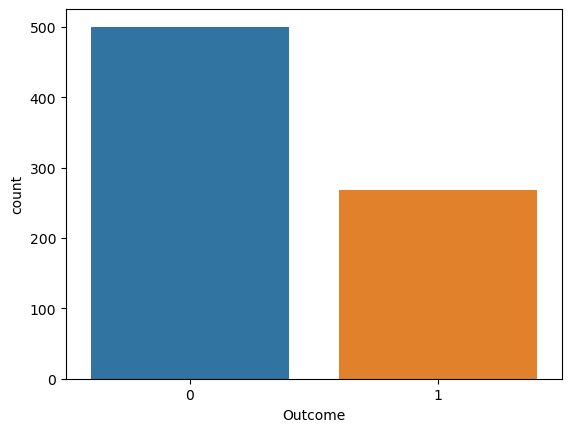

In [8]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = diabetes_data)

In [9]:
data_mean=diabetes_data.iloc[:,1:9]

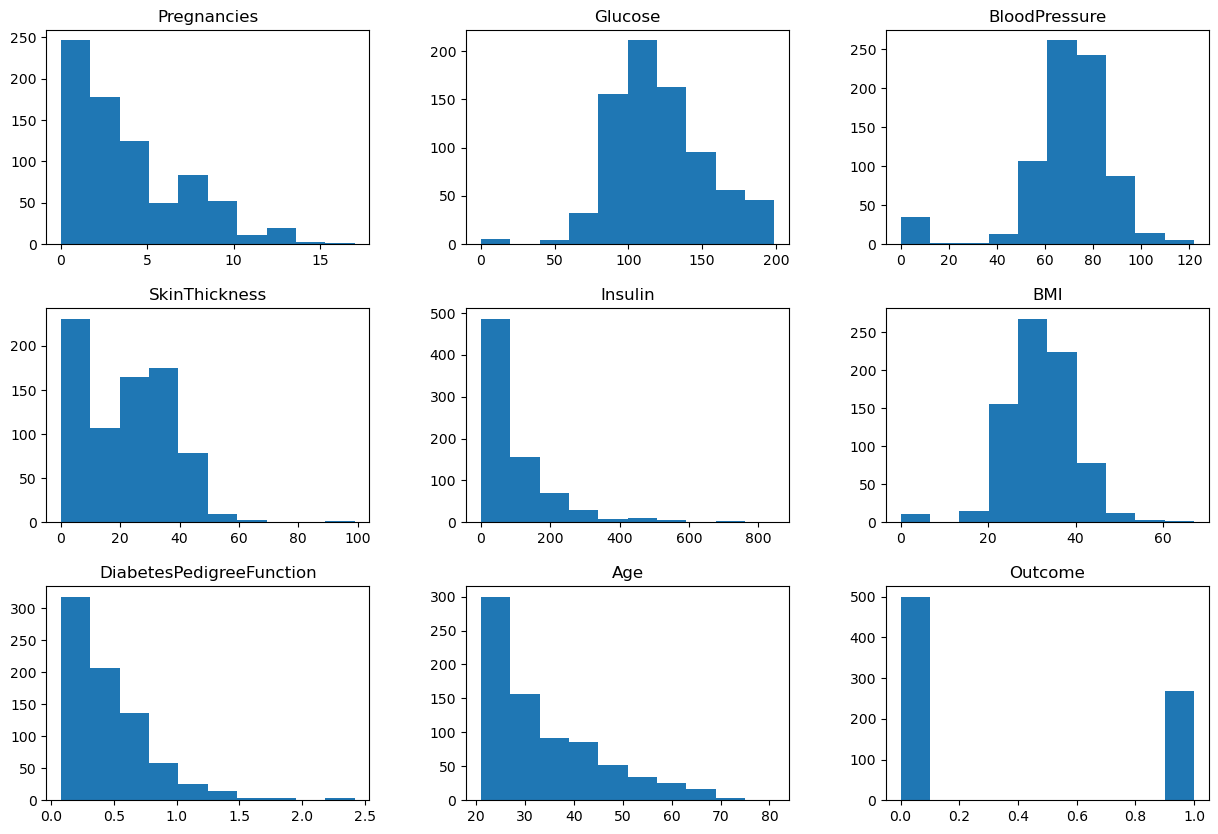

In [10]:
#Plot histograms of CUT1 variables
hist_mean = diabetes_data.hist(bins=10, figsize=(15, 10), grid=False)

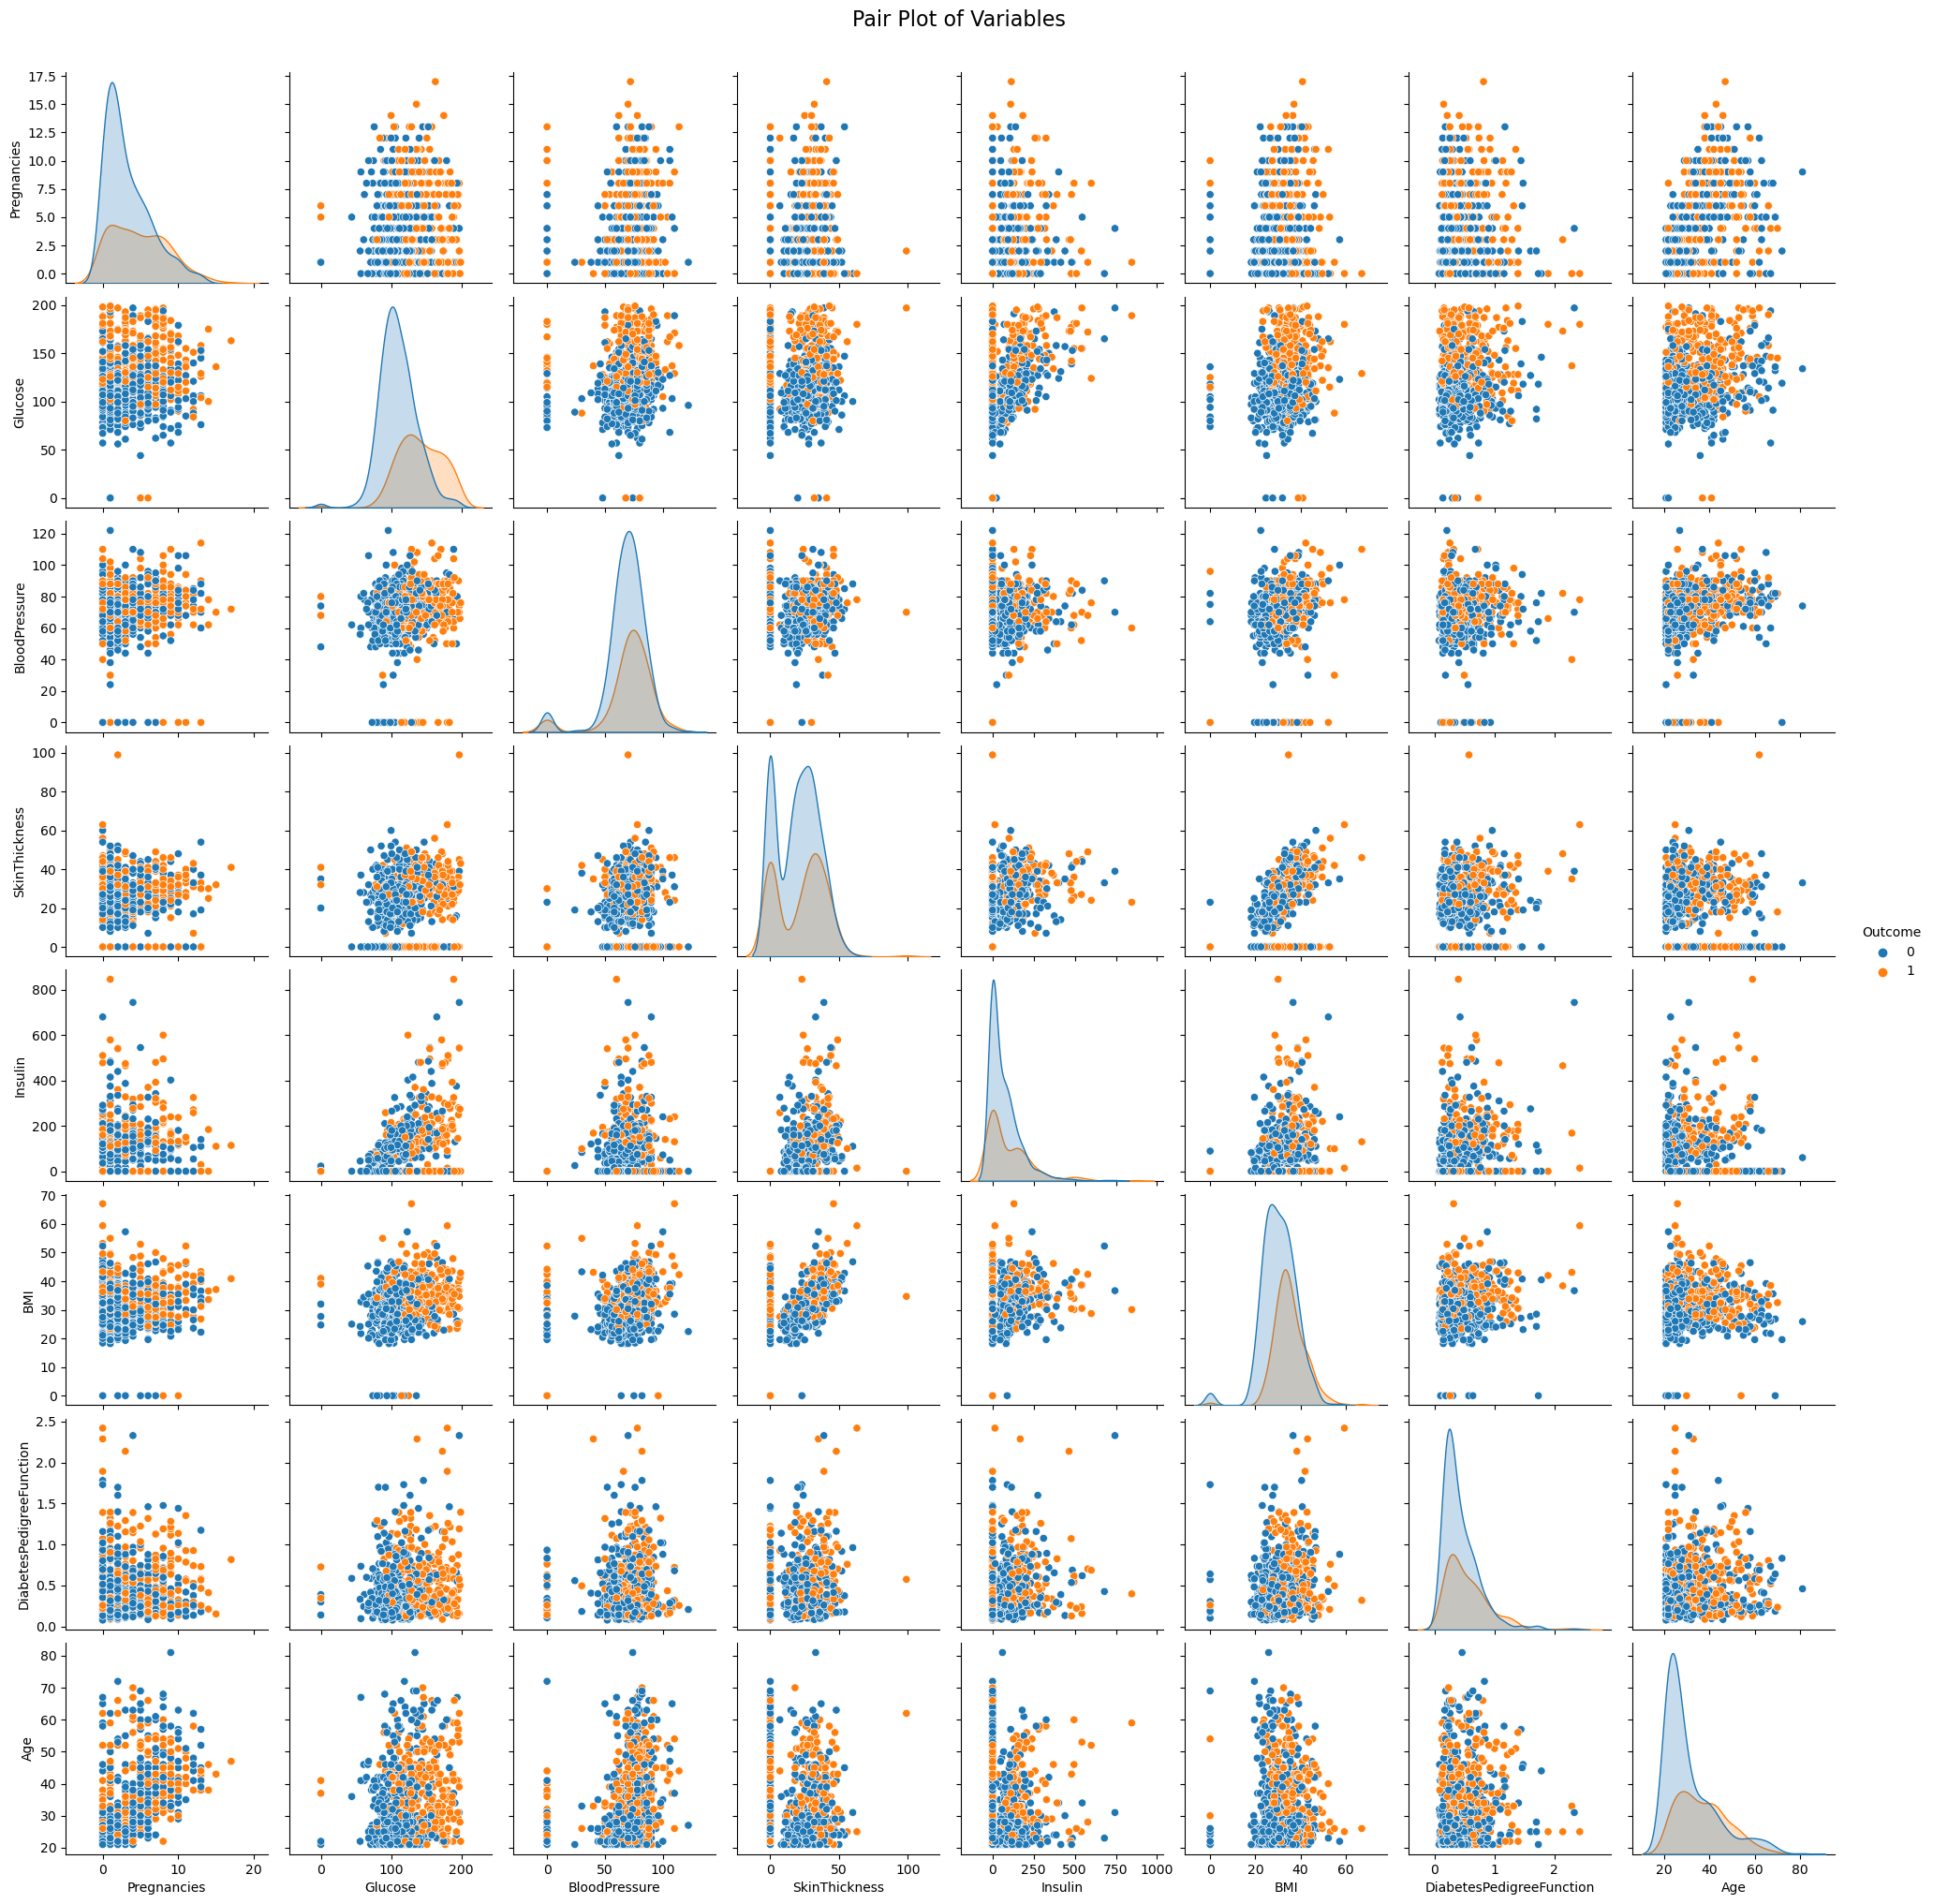

In [12]:
# Scatter plot for pairs of variables
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Variables', x=0.5, y=1.02, fontsize=16)
plt.show()

## Correlation

In [13]:
corr=diabetes_data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

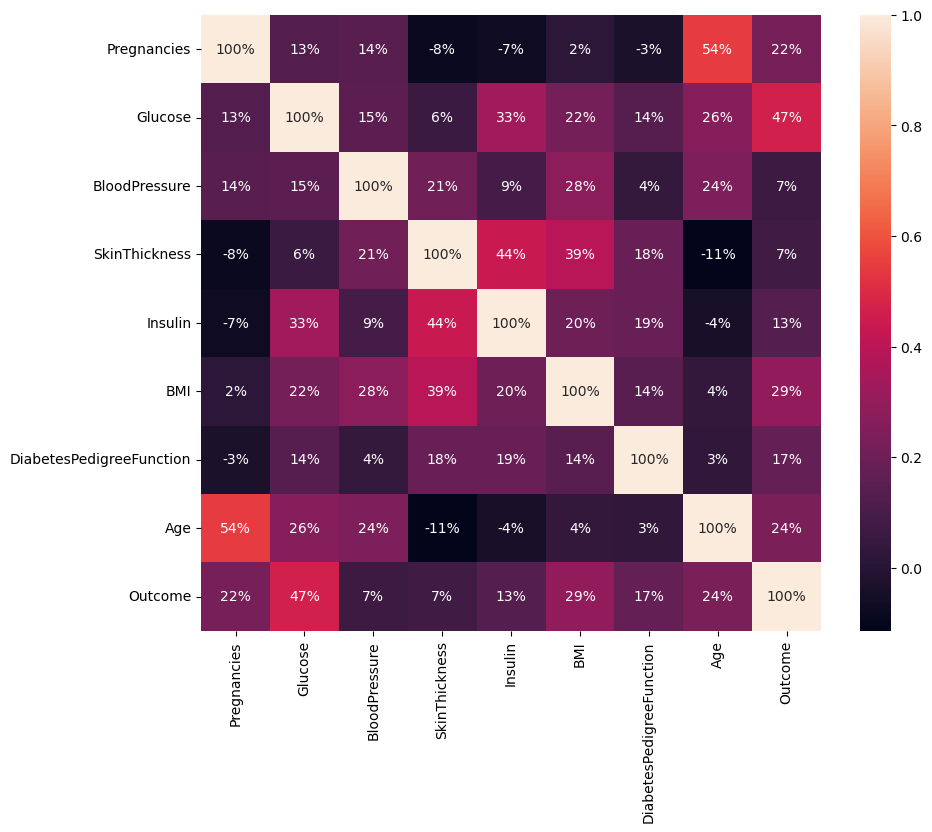

In [30]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(),annot=True, fmt = '.0%')

The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

## Data preprocessing

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [14]:
# Assuming diabetes_data is your DataFrame
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN for specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

In [15]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = diabetes_data[diabetes_data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = diabetes_data.columns
columns = columns.drop("Outcome")

for i in columns:
    median_values = median_target(i)
    diabetes_data.loc[(diabetes_data['Outcome'] == 0) & (diabetes_data[i].isnull()), i] = median_values[i][0]
    diabetes_data.loc[(diabetes_data['Outcome'] == 1) & (diabetes_data[i].isnull()), i] = median_values[i][1]




In [18]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## finding outliers

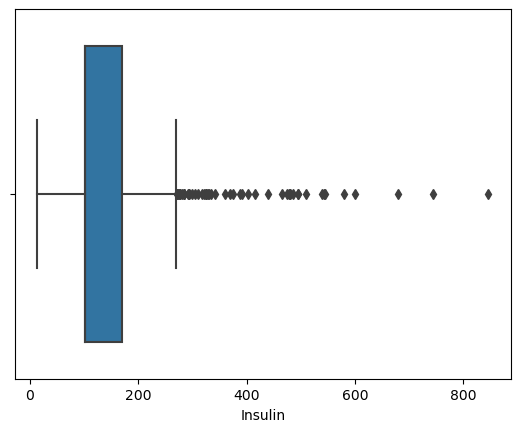

In [20]:
import seaborn as sns
sns.boxplot(x = diabetes_data["Insulin"]);


Insulin levels  find a critical factor in diabetes prediction, and detecting outliers in insulin levels could be relevant.

In [21]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = diabetes_data.Insulin.quantile(0.25)
Q3 = diabetes_data.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetes_data.loc[diabetes_data["Insulin"] > upper,"Insulin"] = upper

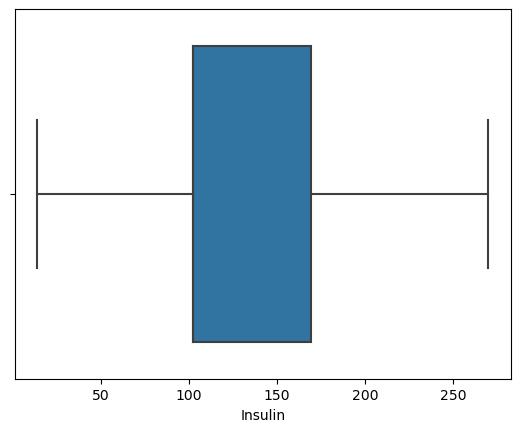

In [111]:
import seaborn as sns
sns.boxplot(x = diabetes_data["Insulin"]);

## Local outlier factor

In [22]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes_data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [23]:
diabetes_data_scores = lof.negative_outlier_factor_
np.sort(diabetes_data_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [24]:
#We choose the threshold value according to lof scores
threshold = np.sort(diabetes_data_scores)[7]
threshold

-1.740031580305444

In [25]:
#We delete those that are higher than the threshold
outlier = diabetes_data_scores > threshold
diabetes_data = diabetes_data[outlier]

In [26]:
diabetes_data.shape

(760, 9)

## Data splitting

In [27]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
diabetes_data.shape

(760, 9)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(608, 8)
(608,)
(152, 8)
(152,)


## Data Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [165]:
# Logistic Regression

# train the model
reg = LogisticRegression()
reg.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = reg.predict(X_test_scale)

# evalation 
print("Confusion Matri")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matri
[[94  7]
 [22 29]]
-----------------------------------------------
Accuracy : 
0.8092105263157895
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       101
           1       0.81      0.57      0.67        51

    accuracy                           0.81       152
   macro avg       0.81      0.75      0.77       152
weighted avg       0.81      0.81      0.80       152



In [35]:
from sklearn.svm import SVC
# Logistic Regression

# train the model
svc = SVC()
svc.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = svc.predict(X_test_scale)

# evalation 
print("Confusion Matri")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matri
[[90 11]
 [ 9 42]]
-----------------------------------------------
Accuracy : 
0.868421052631579
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       101
           1       0.79      0.82      0.81        51

    accuracy                           0.87       152
   macro avg       0.85      0.86      0.85       152
weighted avg       0.87      0.87      0.87       152



In [36]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print(" Naive Bayes accuracy : {:.2f}%".format(nb.score(X_test,y_test)*100))

 Naive Bayes accuracy : 82.89%


In [37]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)
print("XGboost accuracy : {:.2f}%".format(xg.score(X_test,y_test)*100))

XGboost accuracy : 88.82%


## Model build by Decision tree

In [38]:

from sklearn.tree import DecisionTreeClassifier
# create model object  with default parameter 
model_dt = DecisionTreeClassifier()

# create model object  with custom parameter 
# model_dt = DecisionTreeClassifier(criterion='gini',
#                                   random_state=10, 
#                                   min_samples_leaf=5, 
#                                   min_samples_split=20,
#                                   max_leaf_nodes=15,
#                                   max_depth=6)

#fit the model on the data and predict the values
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
model_dt.get_depth()

10

In [40]:
# prediction on Test Data
y_pred= model_dt.predict(X_test)

print(list(zip(y_test,y_pred)))

[(1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (0, 1), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0),

In [41]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[93  8]
 [10 41]]

---------Accuracy Score------------
0.881578947368421

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       101
           1       0.84      0.80      0.82        51

    accuracy                           0.88       152
   macro avg       0.87      0.86      0.87       152
weighted avg       0.88      0.88      0.88       152



In [187]:
# feature importance for all columns
# total will be 1 

print(list(zip(diabetes_data.columns, model_dt.feature_importances_)))

[('Pregnancies', 0.03266930148957975), ('Glucose', 0.0917696461501405), ('BloodPressure', 0.02659766797697833), ('SkinThickness', 0.058485667989215104), ('Insulin', 0.5839250459762233), ('BMI', 0.05302020756902539), ('DiabetesPedigreeFunction', 0.05139744951065708), ('Age', 0.10213501333818059)]


## Bagging approach

In [42]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

#predicting using the Bagging_Classifier
model =BaggingClassifier(n_estimators=10, random_state=10) 

# try to increase the n_estimator  # min_samples_leaf=1, max_depth=None

#fit the model on the data and predict the values
model = model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [174]:
# confusion matrix 
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[96  5]
 [12 39]]

---------Accuracy Score------------
0.8881578947368421

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       101
           1       0.89      0.76      0.82        51

    accuracy                           0.89       152
   macro avg       0.89      0.86      0.87       152
weighted avg       0.89      0.89      0.89       152



## Running random forest model

In [43]:
#predicting using the Random_Forest_Classifier
model_rf = RandomForestClassifier(n_estimators=5000, 
                                          random_state=10,
                                         verbose=1,
                                         n_jobs=-1)

#fit the model on the data and predict the values
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   14.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4

In [44]:
# confusion matrix  
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[94  7]
 [10 41]]

---------Accuracy Score------------
0.8881578947368421

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       101
           1       0.85      0.80      0.83        51

    accuracy                           0.89       152
   macro avg       0.88      0.87      0.87       152
weighted avg       0.89      0.89      0.89       152



# Boosting Classifier

## Running Adaboost classifier

In [45]:
#predicting using the AdaBoost_Classifier
model_AdaBoost=AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(random_state=10),
                                 n_estimators=10,
                                 random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,y_train)

y_pred=model_AdaBoost.predict(X_test)

In [178]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[93  8]
 [ 9 42]]

---------Accuracy Score------------
0.8881578947368421

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       101
           1       0.84      0.82      0.83        51

    accuracy                           0.89       152
   macro avg       0.88      0.87      0.87       152
weighted avg       0.89      0.89      0.89       152



## Running Gradient Boosting classifier

In [46]:
#predicting using the Gradient_Boosting_Classifier
model_GradientBoosting = GradientBoostingClassifier(n_estimators=150,
                                                     random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,y_train)

y_pred=model_GradientBoosting.predict(X_test)

In [180]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[94  7]
 [ 9 42]]

---------Accuracy Score------------
0.8947368421052632

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       101
           1       0.86      0.82      0.84        51

    accuracy                           0.89       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152



# Voting Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# create the sub models
estimators = []

model1 = DecisionTreeClassifier(criterion="gini", random_state=10)
estimators.append(('cart', model1))


model2 = SVC(kernel="rbf", C=50, gamma=0.1)
estimators.append(('svm', model2))

model3 = KNeighborsClassifier(n_neighbors=8)
estimators.append(('knn', model3))

In [49]:
estimators

[('cart', DecisionTreeClassifier(random_state=10)),
 ('svm', SVC(C=50, gamma=0.1)),
 ('knn', KNeighborsClassifier(n_neighbors=8))]

In [50]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
y_pred=ensemble.predict(X_test)
#print(Y_pred)

In [185]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[97  4]
 [15 36]]

---------Accuracy Score------------
0.875

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       101
           1       0.90      0.71      0.79        51

    accuracy                           0.88       152
   macro avg       0.88      0.83      0.85       152
weighted avg       0.88      0.88      0.87       152



## Conclusion

The above  model is performing well on the given dataset. 